In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('ANSUR_II_FEMALE.csv')
df.head()
# Non-numerical columns in the dataset
non_numeric = ['Component','Gender', 'BMI_class', 'Height_class']
# Drop the non-numerical columns from df
ansur_df = df.drop(non_numeric, axis=1)
ansur_df.head()

,Branch,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,Combat Support,231,1282,301,204,1180,222,177,373,315,...,295,850,217,345,942,152,756,65.7,1.560,26.997041
1,Combat Service Support,194,1379,320,207,1292,225,178,372,272,...,254,708,168,329,1032,155,815,53.4,1.665,19.262506
2,Combat Service Support,183,1369,329,233,1271,237,196,397,300,...,269,727,159,367,1035,162,799,66.3,1.711,22.647148
3,Combat Service Support,261,1356,306,214,1250,240,188,384,364,...,302,923,235,371,999,173,818,78.2,1.660,28.378575
4,Combat Arms,309,1303,308,214,1210,217,182,378,320,...,405,1163,300,380,911,152,762,88.6,1.572,35.853259


In [60]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Branch']

# Remove the Gender column to create the training data
X = ansur_df.drop('Branch', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

596 rows in test set vs. 1390 in training set. 94 Features.


In [61]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()
# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

61.6% accuracy on test set vs. 100.0% on training set


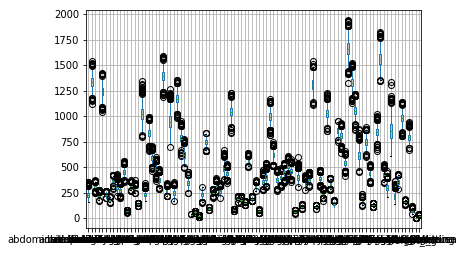

In [62]:
ansur_df.boxplot()
plt.show()

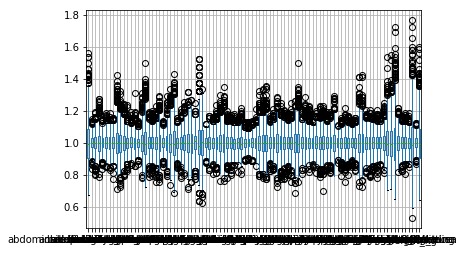

In [64]:
# Normalize the data
normalized_df = X/ X.mean()

normalized_df.boxplot()
plt.show()

In [65]:
print(normalized_df.var())

abdominalextensiondepthsitting    0.018772
acromialheight                    0.001892
acromionradialelength             0.003042
anklecircumference                0.004765
axillaheight                      0.002028
balloffootcircumference           0.002663
balloffootlength                  0.002805
biacromialbreadth                 0.002509
bicepscircumferenceflexed         0.010131
bicristalbreadth                  0.006634
bideltoidbreadth                  0.004058
bimalleolarbreadth                0.002703
bitragionchinarc                  0.002073
bitragionsubmandibulararc         0.002822
bizygomaticbreadth                0.001730
buttockcircumference              0.005523
buttockdepth                      0.010909
buttockheight                     0.003008
buttockkneelength                 0.003047
buttockpopliteallength            0.003505
calfcircumference                 0.005836
cervicaleheight                   0.001819
chestbreadth                      0.004761
chestcircum